In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.cm as cm

# 데이터 불러오기

In [2]:
bmode_data = np.load('/home/jeonk636/MedialImg/Task3/artery2_IQData_bmode.npy')
doppler_data = np.load('/home/jeonk636/MedialImg/Task3/artery2_IQData_doppler_reshape.npy')

In [3]:
print(bmode_data)
print(bmode_data.shape)

[[ 3583418.08984375  5474068.25976562  4351109.20507812 ...
   2477841.33398438  1851925.83007812  -837814.37744141]
 [-1702245.734375   -1650562.046875   -2479432.78515625 ...
   -586235.8828125   -131313.98046875   151071.53466797]
 [ -897349.02148438  -199801.99316406 -1111332.92382812 ...
   -285577.61279297  -154400.65625     -402364.640625  ]
 ...
 [  120067.984375     350284.3515625     37246.82421875 ...
  -1055394.98828125  -591462.87890625   236216.0859375 ]
 [  466749.1796875    330598.75        -210064.3984375  ...
    124439.1015625   -966231.046875   -2758949.6328125 ]
 [-2007504.609375   -1591688.5546875   -575078.734375   ...
   1376463.890625    1256936.40625     1160670.7421875 ]]
(374, 380)


In [4]:
print(doppler_data)
print(doppler_data.shape)

[[[        0.               0.               0.       ...
           0.               0.               0.      ]
  [        0.               0.               0.       ...
           0.               0.               0.      ]
  [        0.               0.               0.       ...
           0.               0.               0.      ]
  ...
  [        0.               0.               0.       ...
           0.               0.               0.      ]
  [        0.               0.               0.       ...
           0.               0.               0.      ]
  [        0.               0.               0.       ...
           0.               0.               0.      ]]

 [[  -159049.328125   -158898.109375   -158044.484375 ...
     -160331.9375     -160360.8125     -159403.765625]
  [        0.               0.               0.       ...
           0.               0.               0.      ]
  [        0.               0.               0.       ...
           0.               0.

# B_mode

In [5]:
env = np.abs(bmode_data)
env

array([[3583418.08984375, 5474068.25976562, 4351109.20507812, ...,
        2477841.33398438, 1851925.83007812,  837814.37744141],
       [1702245.734375  , 1650562.046875  , 2479432.78515625, ...,
         586235.8828125 ,  131313.98046875,  151071.53466797],
       [ 897349.02148438,  199801.99316406, 1111332.92382812, ...,
         285577.61279297,  154400.65625   ,  402364.640625  ],
       ...,
       [ 120067.984375  ,  350284.3515625 ,   37246.82421875, ...,
        1055394.98828125,  591462.87890625,  236216.0859375 ],
       [ 466749.1796875 ,  330598.75      ,  210064.3984375 , ...,
         124439.1015625 ,  966231.046875  , 2758949.6328125 ],
       [2007504.609375  , 1591688.5546875 ,  575078.734375  , ...,
        1376463.890625  , 1256936.40625   , 1160670.7421875 ]])

In [6]:
log_env = 20 * np.log10(env + 1e-6)
log_env

array([[131.08594964, 134.76620417, 132.77199967, ..., 127.88146987,
        125.35247178, 118.46295618],
       [124.62044509, 124.35263709, 127.88704679, ..., 115.36144795,
        102.36621932, 103.58365282],
       [119.05922787, 106.01199633, 120.91688361, ..., 109.11448318,
        103.77298284, 112.09239617],
       ...,
       [101.5885444 , 110.88841473,  91.42178499, ..., 120.46830055,
        115.43854986, 107.46618938],
       [113.38167127, 110.38602414, 106.44704909, ..., 101.89913734,
        119.70161976, 128.81487544],
       [126.05313102, 124.03716187, 115.19454617, ..., 122.77529646,
        121.98626611, 121.29418074]])

In [7]:
bmode_norm = (log_env - log_env.min()) / (log_env.ptp())

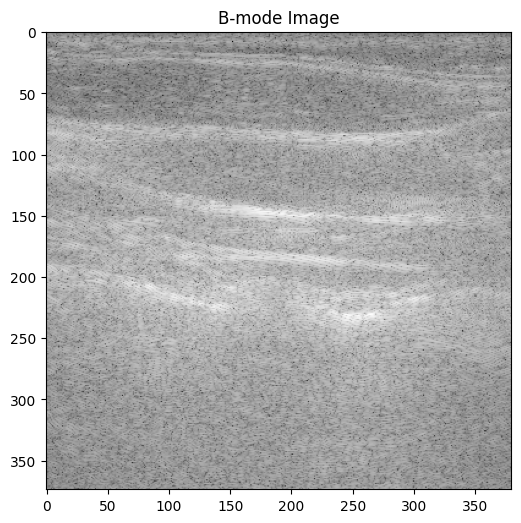

In [8]:
plt.figure(figsize=(6,6))
plt.imshow(bmode_norm, cmap='gray', origin = 'upper')
plt.title('B-mode Image')
plt.show()

In [9]:
vmin,vmax = np.percentile(log_env,[5,99])
bmode_enh = (np.clip(log_env,vmin,vmax)-vmin)/(vmax-vmin)

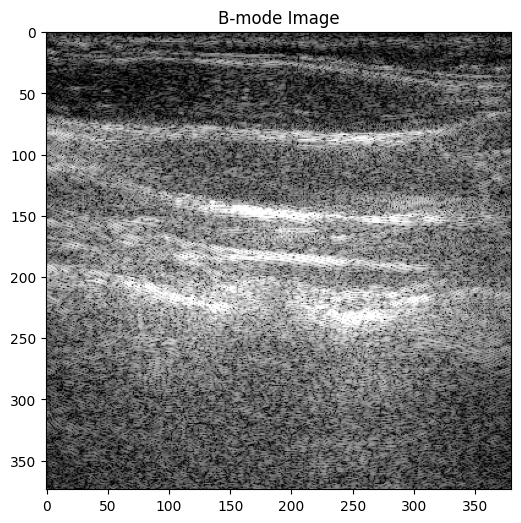

In [10]:
plt.figure(figsize=(6, 6))
plt.imshow(bmode_enh, cmap='gray', origin='upper')
plt.title('B-mode Image')
plt.show()

# Doppler Power Map

In [11]:
power_before = np.sum(np.abs(doppler_data)**2, axis=2)
power_before_norm = (power_before - power_before.min()) / (power_before.ptp())
power_before_norm

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.44181237e-07, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.90140242e-06, 0.00000000e+00, 0.00000000e+00, ...,
        2.95631679e-07, 5.04495886e-07, 0.00000000e+00],
       ...,
       [1.13618713e-03, 4.35680216e-03, 2.02372428e-02, ...,
        4.53515518e-03, 4.45407590e-03, 2.62215300e-03],
       [1.14736415e-03, 2.11784829e-03, 1.09957377e-02, ...,
        5.51636544e-03, 2.03341528e-03, 1.49333999e-03],
       [1.81858748e-03, 2.49740730e-03, 1.01187968e-02, ...,
        4.16554999e-03, 1.21236077e-03, 9.67458133e-04]])

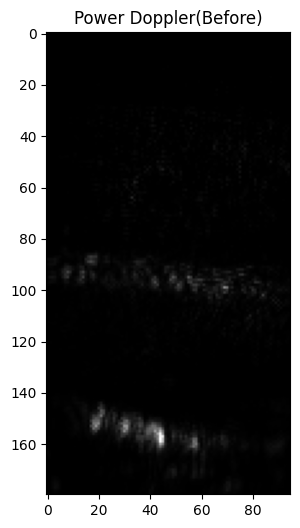

In [12]:
plt.figure(figsize=(6,6))
plt.imshow(power_before_norm, cmap='gray', origin = 'upper')
plt.title('Power Doppler(Before)')
plt.show()

# SVD

In [13]:
d, l, e = doppler_data.shape
X = doppler_data.reshape(d*l,e) # space*time 행렬
print(X.shape)

(17100, 300)


# Threshold 결정

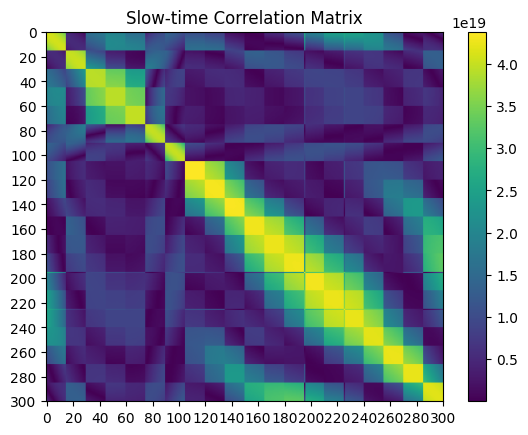

In [14]:
R_t = X.conj().T @ X 
plt.figure()
plt.imshow(np.abs(R_t), aspect='auto', origin='upper')
plt.title('Slow-time Correlation Matrix')
plt.colorbar()
interval = 20
range = np.arange(0, R_t.shape[0]+1, interval)
plt.xticks(range)
plt.yticks(range)

plt.show()

In [15]:
U, S, V = np.linalg.svd(X, full_matrices=False)
print(U.shape, S.shape, V.shape)

(17100, 300) (300,) (300, 300)


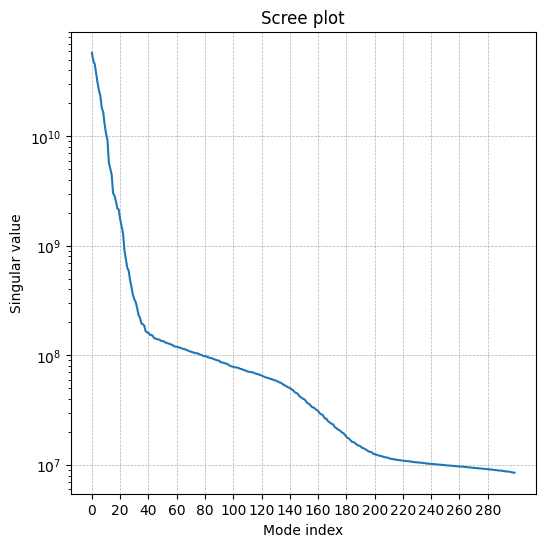

In [16]:
plt.figure(figsize=(6, 6))
plt.plot(S)
plt.yscale('log')
plt.xlabel('Mode index')
plt.ylabel('Singular value')
plt.title('Scree plot')

x_interval = 20
x_ticks = np.arange(0, len(S), x_interval)
plt.xticks(x_ticks)

plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

In [17]:
S_filt = S.copy()
S_filt[:45] = 0  
S_filt[220:] = 0  
X_sig = U @ np.diag(S_filt) @ V
doppler_sig = X_sig.reshape(d, l, e)

power_after = np.sum(np.abs(doppler_sig)**2, axis=2)
power_after_norm = (power_after - power_after.min()) / power_after.ptp()

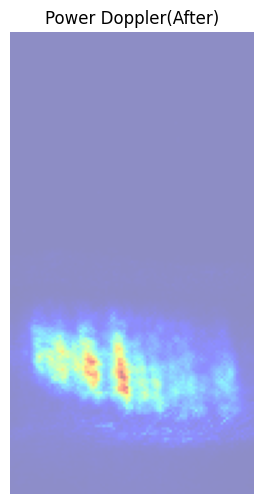

In [18]:
plt.figure(figsize=(6,6))
plt.imshow(power_after_norm, cmap='jet', alpha=0.45, origin='upper')
plt.axis('off')
plt.title('Power Doppler(After)')
plt.show()

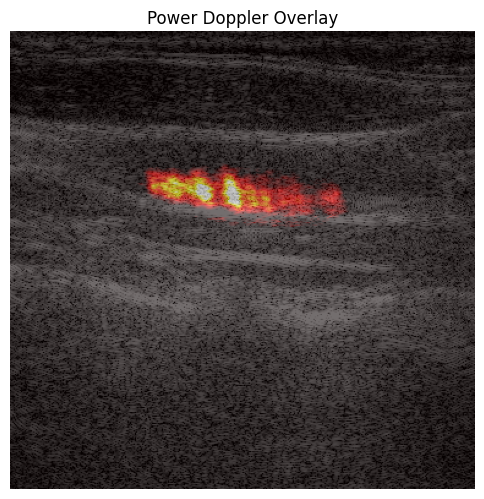

In [19]:
power_resized = cv2.resize(power_after_norm, (l*2, d), interpolation=cv2.INTER_LINEAR)

dx = int(round(190 - 95))
dy = 0
M = np.array([[1, 0, dx], [0, 1, dy]], dtype=np.float32)

aligned = cv2.warpAffine(
    power_resized, M, (bmode_enh.shape[1], bmode_enh.shape[0]),
    flags=cv2.INTER_NEAREST,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=0
)

plt.figure(figsize=(6, 6))
plt.imshow(bmode_enh, cmap='gray', origin='upper')
plt.imshow(aligned, cmap='hot', alpha=0.57, origin='upper', vmin=0.1, vmax=0.7)
plt.title('Power Doppler Overlay')
plt.axis('off')
plt.show()

/tmp/ipykernel_1823454/2255487316.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('hot')


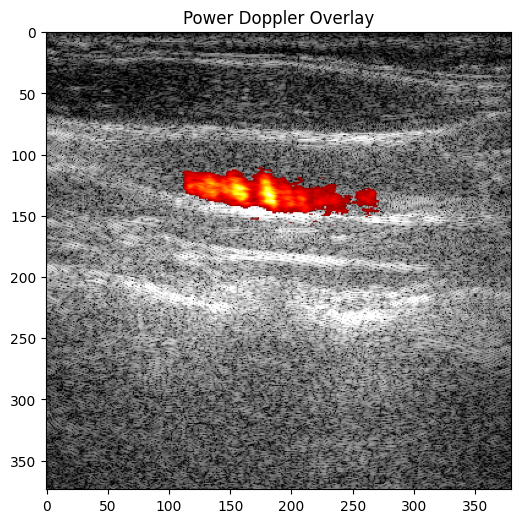

In [20]:
bmode_rgb = np.stack([bmode_enh]*3, axis=-1)

cmap = cm.get_cmap('hot')
doppler_rgb = cmap(aligned)[:, :, :3]

overlay = bmode_rgb.copy()
overlay[aligned >= 0.2] = doppler_rgb[aligned >= 0.2] 

plt.figure(figsize=(6,6))
plt.imshow(overlay)
plt.title('Power Doppler Overlay')
plt.show()
